In [1]:
# loading required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, accuracy_score
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

%config InlineBackend.figure_format = 'retina'

# to display all columns and rows:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);

In [2]:
# reading the data from csv
customer_data = pd.read_csv("churn.csv", index_col=0)

In [3]:
# To view top 5 records 
customer_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# The size of the data set 
customer_data.shape

(10000, 13)

In [5]:
# column information
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
customer_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


1. The columns customerId, Surname are uniques name and ids which does not have any significant effect on target variable, so we can drop this two columns.

In [7]:
# Droping CustomerId and surname column 
customer_data = customer_data.drop(['CustomerId','Surname'],axis = 1)
customer_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# summary statistics of the dataset
customer_data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


### Initial summary of the dataset:
1. The dataset consist of 10000 records with 12 feature variable and 1 traget variable
2. The credit score range from 350 to 850.
3. The customer were in the age range of 18 to 92.
4. The tenure considered for this dataset is 10 years.
5. The customers are using 1 to 4 products of the bank.
6. There were 2 columns which were not significant for the prediction of target varibale, so those columns were removed.
7. The dataset is quite clean dataset with no null values and no duplicate values.



In [10]:
# categorical Variables
categorical_variables = [col for col in customer_data.columns if col in "O"
                        or customer_data[col].nunique() <=11
                        and col not in "Exited"]

categorical_variables

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember']

In [11]:
# Numeric Variables
numeric_variables = [col for col in customer_data.columns if customer_data[col].dtype != "object"
                        and customer_data[col].nunique() >11
                        and col not in "CustomerId"]
numeric_variables

['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

#  1. Exploratory Data Analysis

 ## lets see the churn customer  vs non churn customer percentage

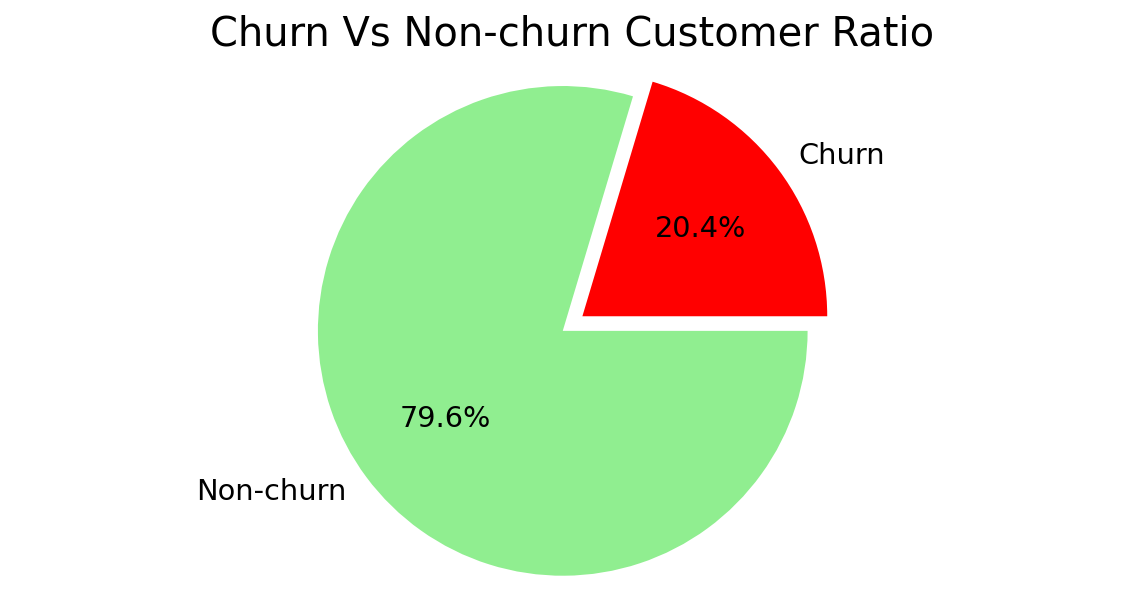

In [12]:
# plot for churn vs non churn customer
fig, axs = plt.subplots(figsize=(10, 5))
sizes = [customer_data.Exited[customer_data['Exited']==1].count(), customer_data.Exited[customer_data['Exited']==0].count()]
axs.pie(sizes, explode=(0, 0.1), labels=['Churn', 'Non-churn'], autopct='%1.1f%%',shadow=False,
        textprops = {'size': 'x-large'},
        colors = ['red','lightgreen'])
axs.axis('equal')
plt.title("Churn Vs Non-churn Customer Ratio", size = 20)
plt.show()

## Barplot for catagorical variables

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

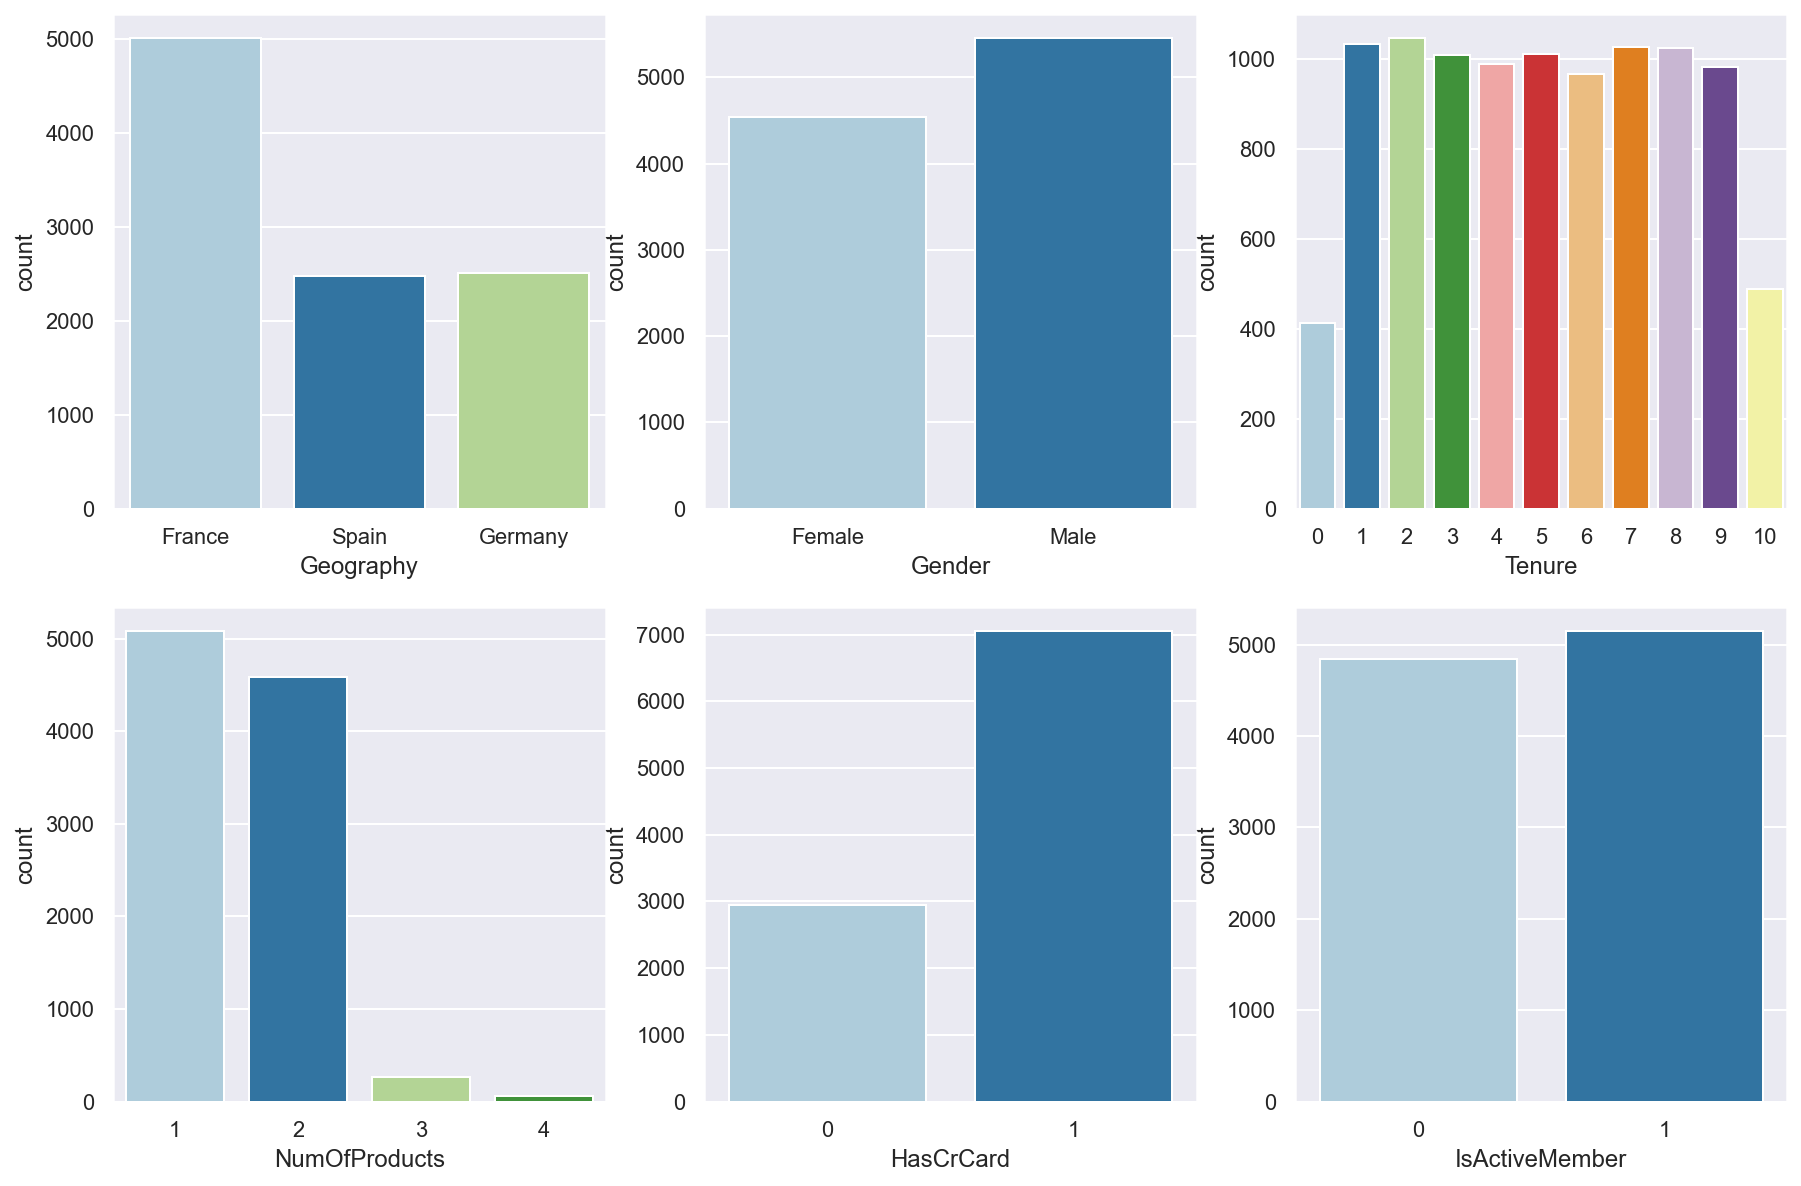

In [13]:
# categorical variables barplot

sns.set(rc={'figure.figsize':(15,10)})
fig,axs = plt.subplots(2,3)
sns.set_theme(palette="Paired")
sns.countplot(data = customer_data,x = 'Geography',ax=axs[0,0])
sns.countplot(data = customer_data,x = 'Gender',ax=axs[0,1])
sns.countplot(data = customer_data,x = 'Tenure',ax=axs[0,2])
sns.countplot(data = customer_data,x = 'NumOfProducts',ax=axs[1,0])
sns.countplot(data = customer_data,x = 'HasCrCard',ax=axs[1,1])
sns.countplot(data = customer_data,x = 'IsActiveMember',ax=axs[1,2])


plot 1 - Geography :About 50% of the customer are from france and rest  equal customers are from Spain and Germany.

Plot 2 - Gender :  Male customer count is greater than that of female cutsomer count.

Plot 3 - Tenure : This is a balanced graph. Almost equal number of cutomers fall under different tenure bracket.

Plot 4 - NumOfProduct :Around 50% customers have atleast used 1 product and follwed by  around 45% of the customer have used 2 product and less than 5% cutomer used more than 2 products.

Plot 5 - HasCrCard :  Around 70% customers use a bank given creditcard.

Plot 6 - IsActiveMember : Almost equal number of customers are active and non active users.

## Distribution of continuous variables

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

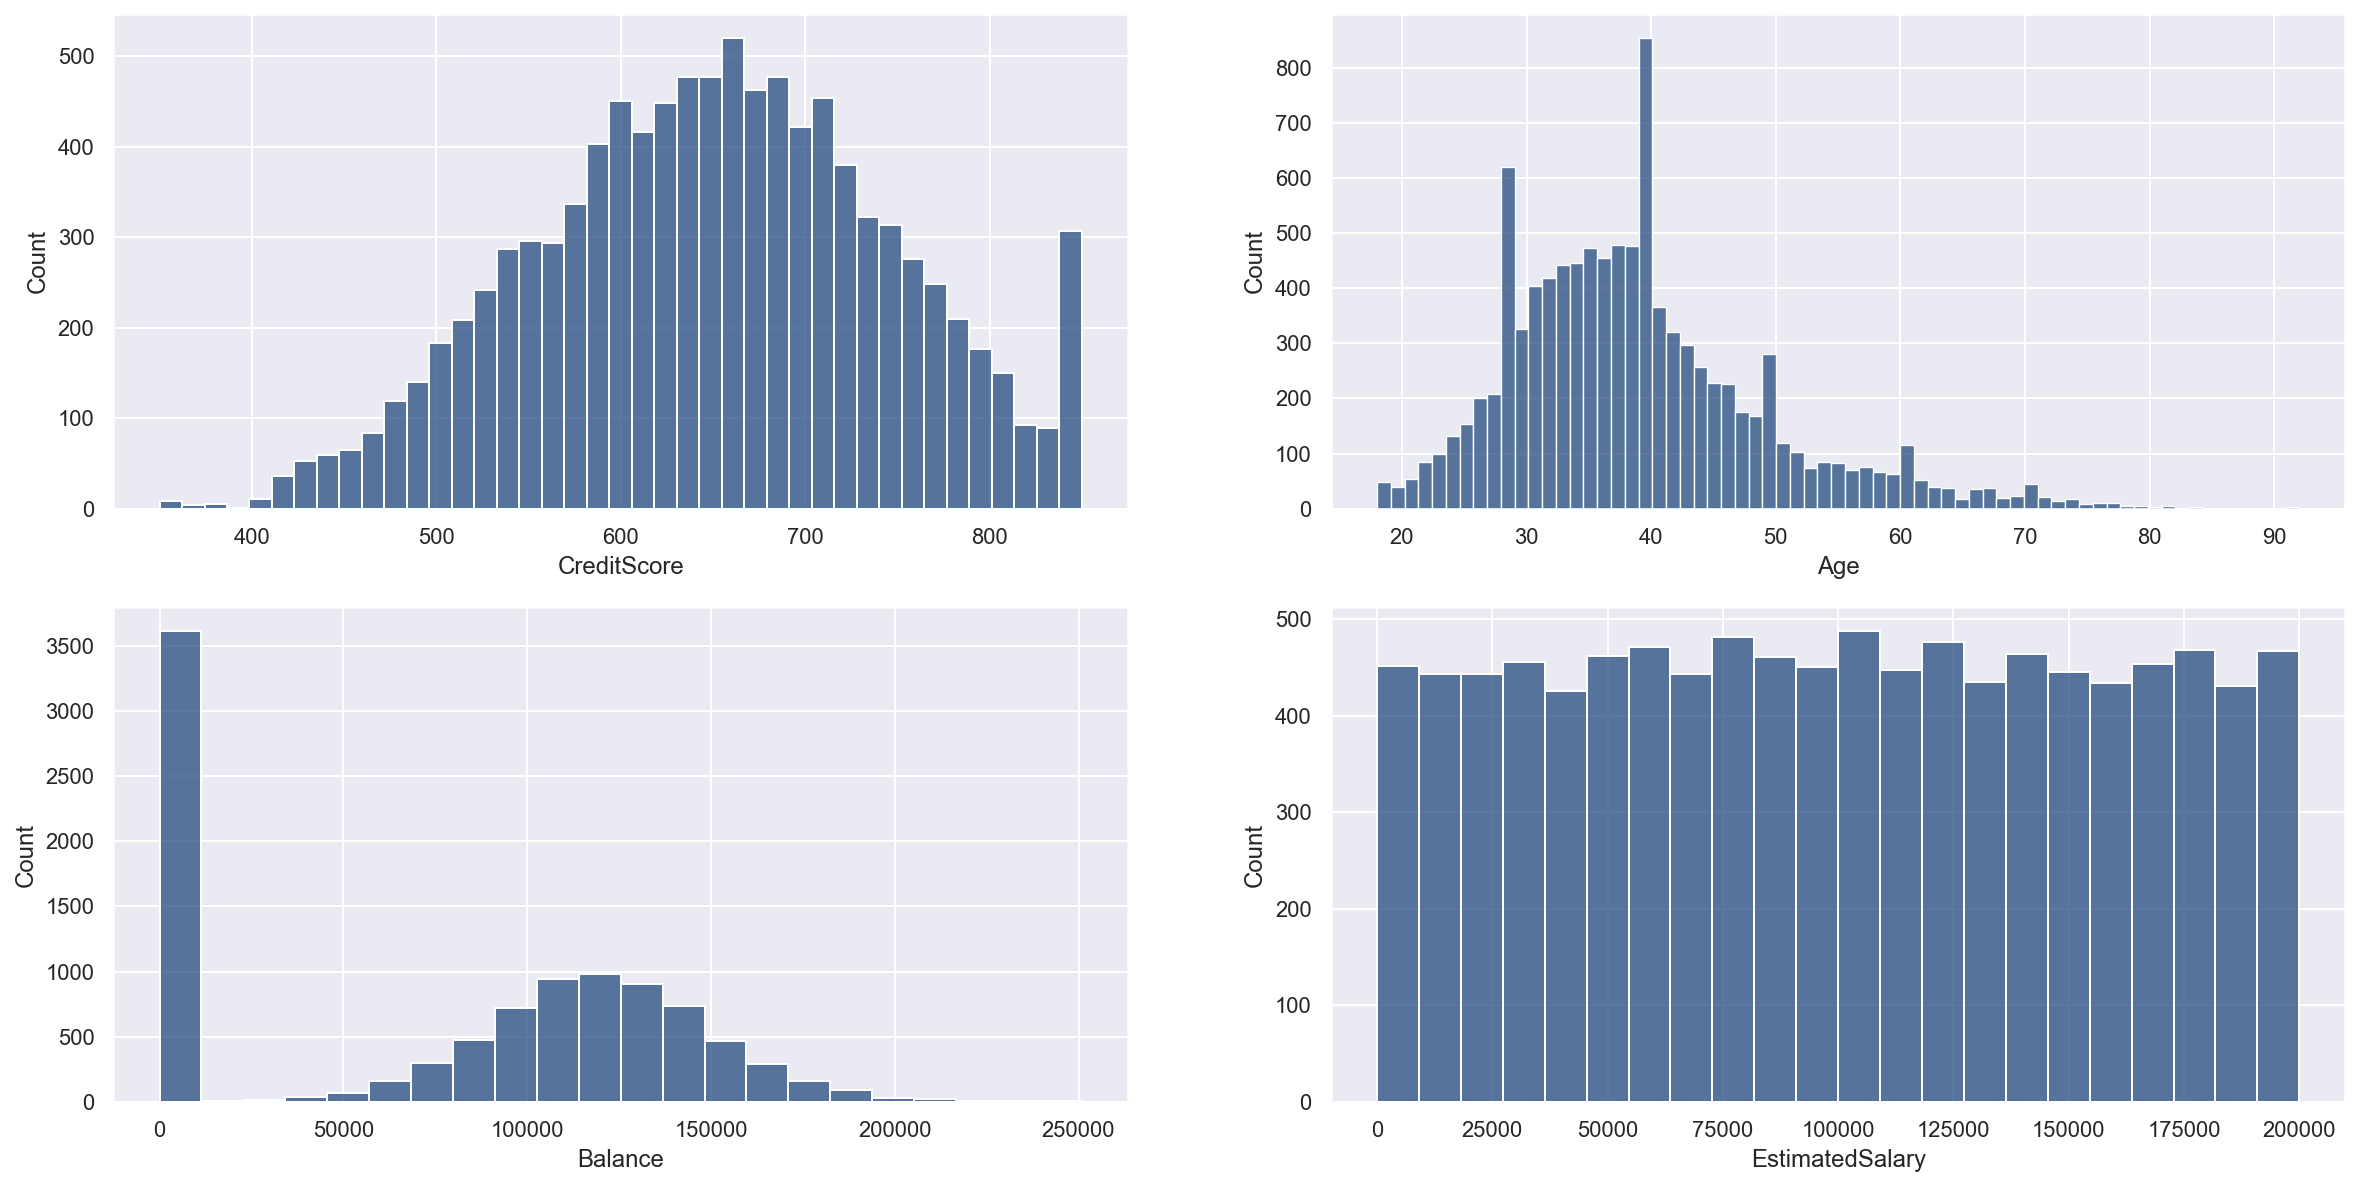

In [14]:
# checking histogram for continuous variable
sns.set(rc={'figure.figsize':(20,10)})
fig,axs = plt.subplots(2,2)
sns.set_theme(palette="crest_r")
sns.histplot(data = customer_data,x = "CreditScore",ax=axs[0,0])
sns.histplot(data = customer_data,x = "Age",ax=axs[0,1])
sns.histplot(data = customer_data,x = "Balance",ax=axs[1,0])
sns.histplot(data = customer_data,x = "EstimatedSalary",ax=axs[1,1])

•	plot 1 - Credit Score: The credit Score plot is a bell-shaped curve with most of the customer has less than 700 credit score.

•	Plot 2 - Age: Age graph is right skewed. That means most of the customers are young and in the age range of 29-40 age. and very few customers are after the age of 60 years.

•	Plot 3 - Balance: The account balance is a normally distributed curve but more than 3500 customers have a bank balance of 0.

•	Plot 4 - EstimatedSalary: The estimated salary of customers is evenly distributed among all the category of salary range.


<AxesSubplot:>

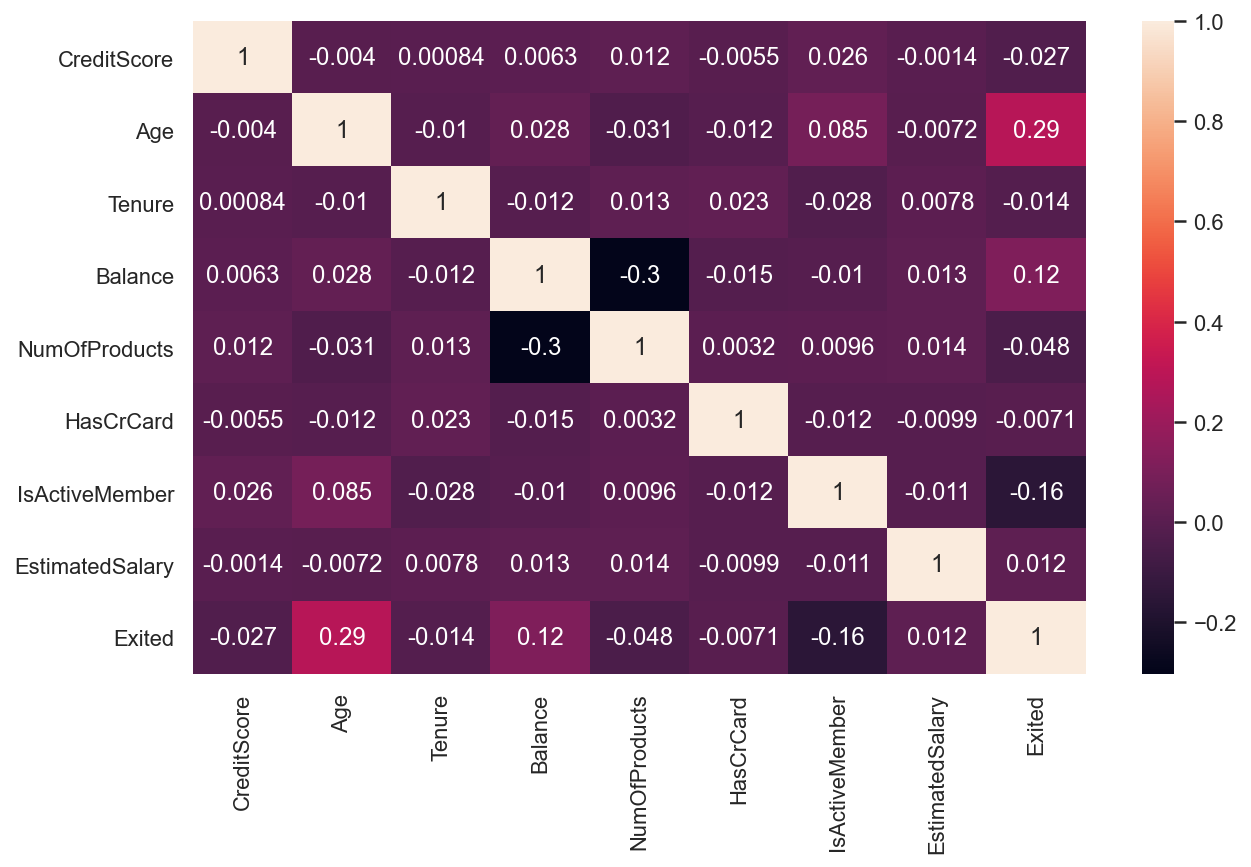

In [15]:
# correlation check between all feature columns and target column

sns.set(rc={'figure.figsize':(10,6)})
corr = customer_data.corr()
sns.heatmap(corr,annot=True)

 The corelation plot shows that age has a positve corelation with Exited column. We will explore the correation of different  input features with target variable( Exited) in follwing section.

## Exploration of all the variables with respect to exited variable

In [16]:
customer_data_wo_exited = customer_data.drop(columns = 'Exited')
customer_data_wo_exited.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
3,502,France,Female,42,8,159660.80,3,1,0,113931.57
4,699,France,Female,39,1,0.00,2,0,0,93826.63
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


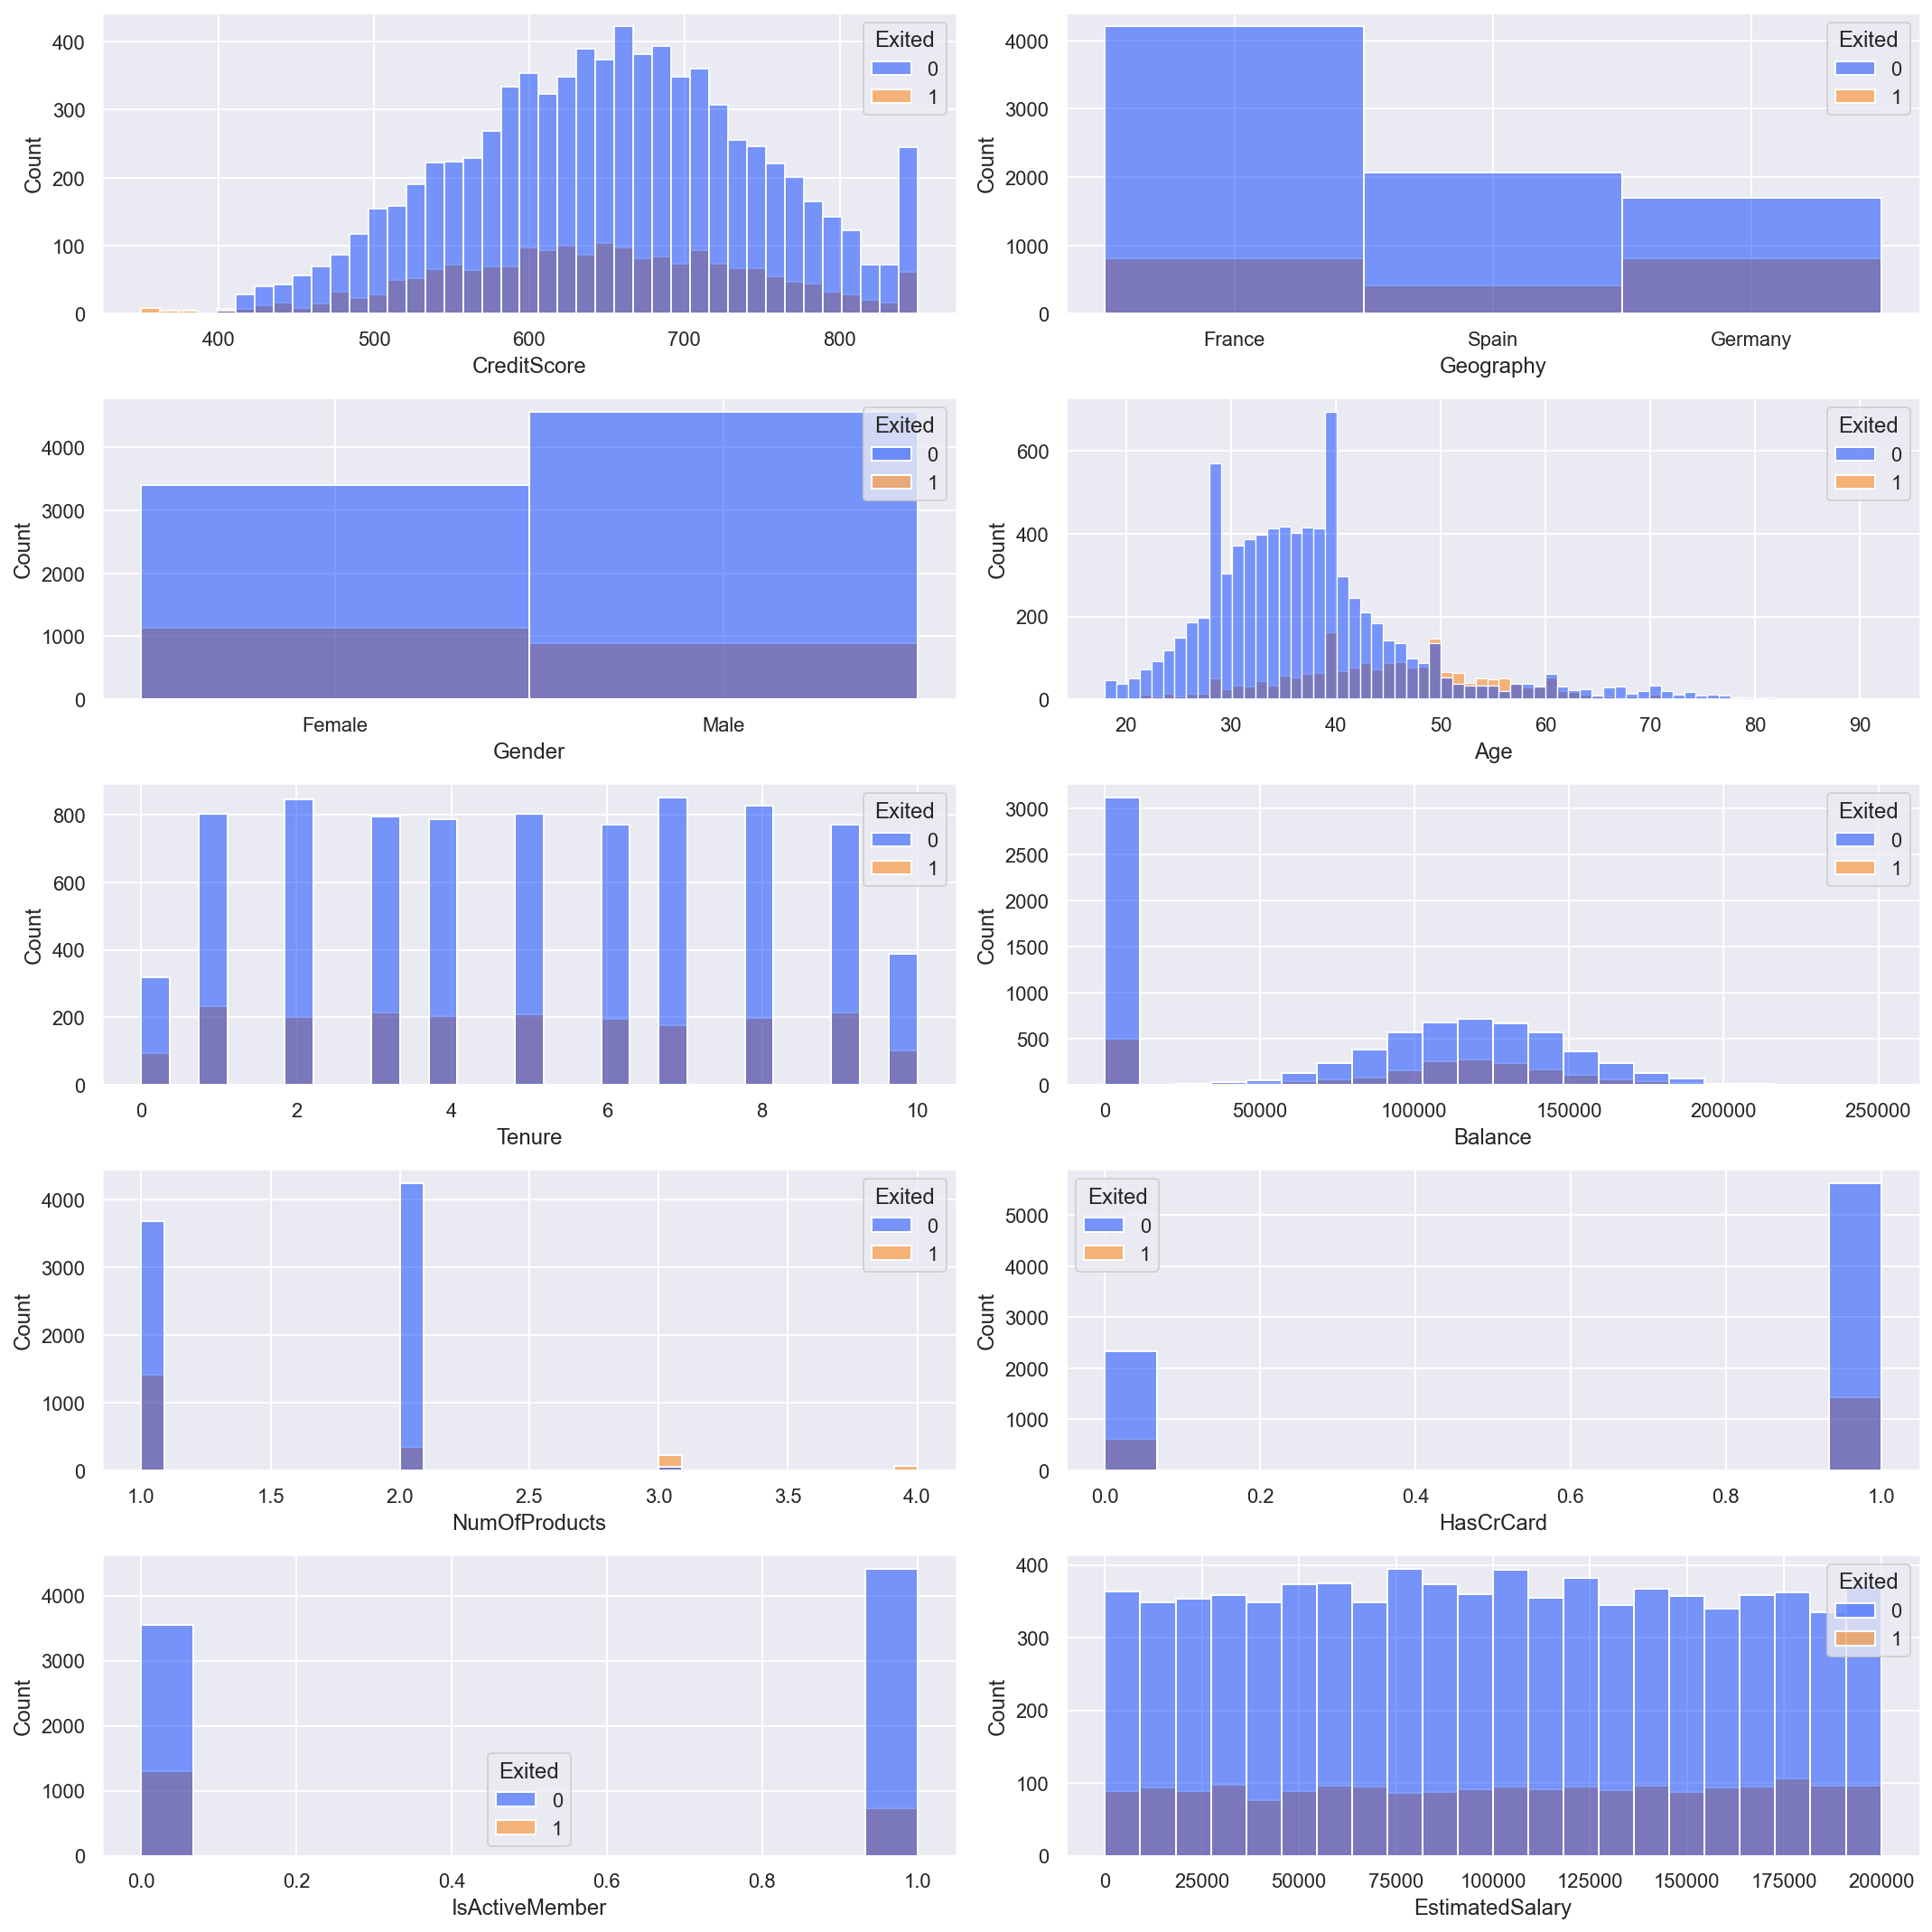

In [17]:
plt.figure(figsize=(15,15))
for i in range(0,len(customer_data_wo_exited.columns)):
    plt.subplot(5,len(customer_data_wo_exited.columns)/5,i+1)
    sns.histplot(customer_data, x = customer_data[customer_data.columns[i]], hue = 'Exited', palette="bright")
    plt.tight_layout()
#plt.savefig('featureVsTarget.png')

 ## Summary of all the features columns with respect to Exited column

1.	Plot1 (CreditScore vs Exited): Most of the customers having credit score in between 600 to 700 exited the bank more than the other credit score range.
2.  Plot2 (Geography vs Exited): Though France has most customers but the churn rate for Germany customer is the highest whereas the churn rate is lowest in France.
3.  Plot3 (Gender vs Exited): Female customers tends to churn more than male counterparts.
4.	Plot4 (Age vs Exited):  Customers in the age bracket of 40-600 tends to churn more than the younger customers.
5.	Plot5 (Tenure vs Exited): Almost all the tenure category has around 15-20% churn rate.
6.	Plot6 (Balance vs Exited): surprisingly customers with zero balance tends to churn less. 
7.	Plot7 (NumOfProduct vs Exited): Customers who has used only one product tends to churn more and also customers who has used more than 2 products tends to churn more. Customers using 2 products are less prone to churn.
8.	Plot8 (HasCrCard vs Exited): Customers having credit card and not having a credit card tends to churn equally.
9.	Plot9 (IsActiveMember vs Exited): Customers who are not active members churn more.
10.	Plot10 (EstimatedSalary vs Exited): Customers in all the salary bracket are equally churned.

# 2. Data Preprocessing

## Data Cleaning

In [18]:
#Check for missing value
customer_data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [19]:
# checking for duplicate values in dataset
customer_data.duplicated().sum()

0

# Feature Engineering

## Outliers detection

In [20]:
# to find threshold value for outliers
def outlier_thresholds(dataframe, variable, low_quantile=0.05, up_quantile=0.95):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

In [21]:
# defining the function for checking for outliers in the variables
def check_outliers(dataframe, numeric_columns, plot=False):
   # variable_names = []
    for col in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            print(col, " : ", number_of_outliers, "outliers")
            
            if plot:
                sns.boxplot(x=dataframe[col])
                plt.show()

In [22]:
# check for outliers in numeric variables
for var in numeric_variables:
    print(var, "has " , check_outliers(customer_data, [var]),  "Outliers")

CreditScore has  None Outliers
Age has  None Outliers
Balance has  None Outliers
EstimatedSalary has  None Outliers


## Feature Transformation

Now changing the catagorical variables to numeric by implement pandas get_dummies method. 

In [23]:
customer_data["NumOfProducts"] = customer_data["NumOfProducts"].astype("category")
customer_data["HasCrCard"] = customer_data["HasCrCard"].astype("category")
customer_data["IsActiveMember"] = customer_data["IsActiveMember"].astype("category")

customer_data = pd.get_dummies(customer_data, columns = ["Geography"])
customer_data = pd.get_dummies(customer_data, columns = ["Gender"])
customer_data = pd.get_dummies(customer_data, columns = ["NumOfProducts"])
customer_data = pd.get_dummies(customer_data, columns = ["HasCrCard"])
customer_data = pd.get_dummies(customer_data, columns = ["IsActiveMember"])

In [24]:
customer_data.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
RowNumber,,,,,,,,,,,,,,,,,,,
1,619,42,2,0.00,101348.88,1,1,0,0,1,0,1,0,0,0,0,1,0,1
2,608,41,1,83807.86,112542.58,0,0,0,1,1,0,1,0,0,0,1,0,0,1
3,502,42,8,159660.80,113931.57,1,1,0,0,1,0,0,0,1,0,0,1,1,0
4,699,39,1,0.00,93826.63,0,1,0,0,1,0,0,1,0,0,1,0,1,0
5,850,43,2,125510.82,79084.10,0,0,0,1,1,0,1,0,0,0,0,1,0,1


## Feature Scalling

To bring the numerical columns to one scale, we applied the normalization method.

In [25]:
x_customer_data = customer_data.drop(["Exited"], axis=1)
y = customer_data["Exited"]

X = (x_customer_data - np.min(x_customer_data)) / (np.max(x_customer_data)-np.min(x_customer_data)).values
X.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
RowNumber,,,,,,,,,,,,,,,,,,
1,0.538,0.324324,0.2,0.000000,0.506735,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.516,0.310811,0.1,0.334031,0.562709,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.304,0.324324,0.8,0.636357,0.569654,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.698,0.283784,0.1,0.000000,0.469120,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5,1.000,0.337838,0.2,0.500246,0.395400,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


# 3. Modeling

In [27]:
# Train-Test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)

In [28]:
# Shape of train_test split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 18), (2000, 18), (8000,), (2000,))

In [29]:
# Models for Classification
np.random.seed(42)
models = [('LR', LogisticRegression(random_state=12345)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=12345)),
          ('RF', RandomForestClassifier(random_state=12345)),
          ('SVC', SVC(gamma='auto',random_state=12345, probability=True)),
          ("GB", GradientBoostingClassifier(random_state=123456))]

In [30]:
# fitting the model and checking for accuracy.
np.random.seed(42)
training_accuracy = []
test_accuracy =[]
names = []
for name, model in models:
    model.fit(X_train, y_train)
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    training_accuracy.append(accuracy_train)
    test_accuracy.append(accuracy_test)
    names.append(name)
    print(f"{name}: Training Accuracy: {accuracy_train} and Test Accuracy: {accuracy_test}")
   
   

LR: Training Accuracy: 0.840375 and Test Accuracy: 0.849
KNN: Training Accuracy: 0.872125 and Test Accuracy: 0.824
CART: Training Accuracy: 1.0 and Test Accuracy: 0.7915
RF: Training Accuracy: 1.0 and Test Accuracy: 0.854
SVC: Training Accuracy: 0.819125 and Test Accuracy: 0.822
GB: Training Accuracy: 0.872875 and Test Accuracy: 0.8595


In [31]:
# using cross validation checking for CV accuracy
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=12345)
    cv_results = cross_val_score(model, X, y, cv=kfold)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {round(cv_results.mean(),4)} ({round((cv_results.std()),4)})")

LR: 0.8406 (0.0099)
KNN: 0.8251 (0.0073)
CART: 0.7913 (0.0121)
RF: 0.8619 (0.0082)
SVC: 0.8201 (0.0103)
GB: 0.8634 (0.0085)


In [32]:
# Confusion Matrix
# Logistic Regression
model_LR = LogisticRegression(random_state=12345)
model_LR.fit(X_train, y_train)
y_pred_LR = model_LR.predict(X_test)
conf_mat_LR = confusion_matrix(y_pred_LR,y_test)
print('Logistic Regression :\n', conf_mat_LR)
# KNeighborsClassifier
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, y_train)
y_pred_KNN = model_KNN.predict(X_test)
conf_mat_KNN = confusion_matrix(y_pred_KNN,y_test)
print('K-NearestNeighbour :\n',conf_mat_KNN)
# DecisionTreeClassifier
model_CART = DecisionTreeClassifier(random_state=12345)
model_CART.fit(X_train, y_train)
y_pred_CART = model_CART.predict(X_test)
conf_mat_CART = confusion_matrix(y_pred_CART,y_test)
print('Decision Tree(CART) :\n',conf_mat_CART)
# RandomForestClassifier
model_RF = RandomForestClassifier(random_state=12345)
model_RF.fit(X_train, y_train)
y_pred_RF = model_RF.predict(X_test)
conf_mat_RF = confusion_matrix(y_pred_RF,y_test)
print('Random Forest :\n',conf_mat_RF)
# SVC
model_SVC = SVC(gamma='auto', random_state=12345, probability = True)
model_SVC.fit(X_train, y_train)
y_pred_SVC = model_SVC.predict(X_test)
conf_mat_SVC = confusion_matrix(y_pred_SVC,y_test)
print('Support Vector Machine(SVC) :\n',conf_mat_SVC)
# Gradient Boost
model_GB = GradientBoostingClassifier(random_state=123456)
model_GB.fit(X_train, y_train)
y_pred_GB = model_GB.predict(X_test)
conf_mat_GB = confusion_matrix(y_pred_GB,y_test)
print('Gradient Boost :\n',conf_mat_GB)

Logistic Regression :
 [[1539  253]
 [  49  159]]
K-NearestNeighbour :
 [[1498  262]
 [  90  150]]
Decision Tree(CART) :
 [[1376  205]
 [ 212  207]]
Random Forest :
 [[1523  227]
 [  65  185]]
Support Vector Machine(SVC) :
 [[1577  345]
 [  11   67]]
Gradient Boost :
 [[1534  227]
 [  54  185]]


<AxesSubplot:>

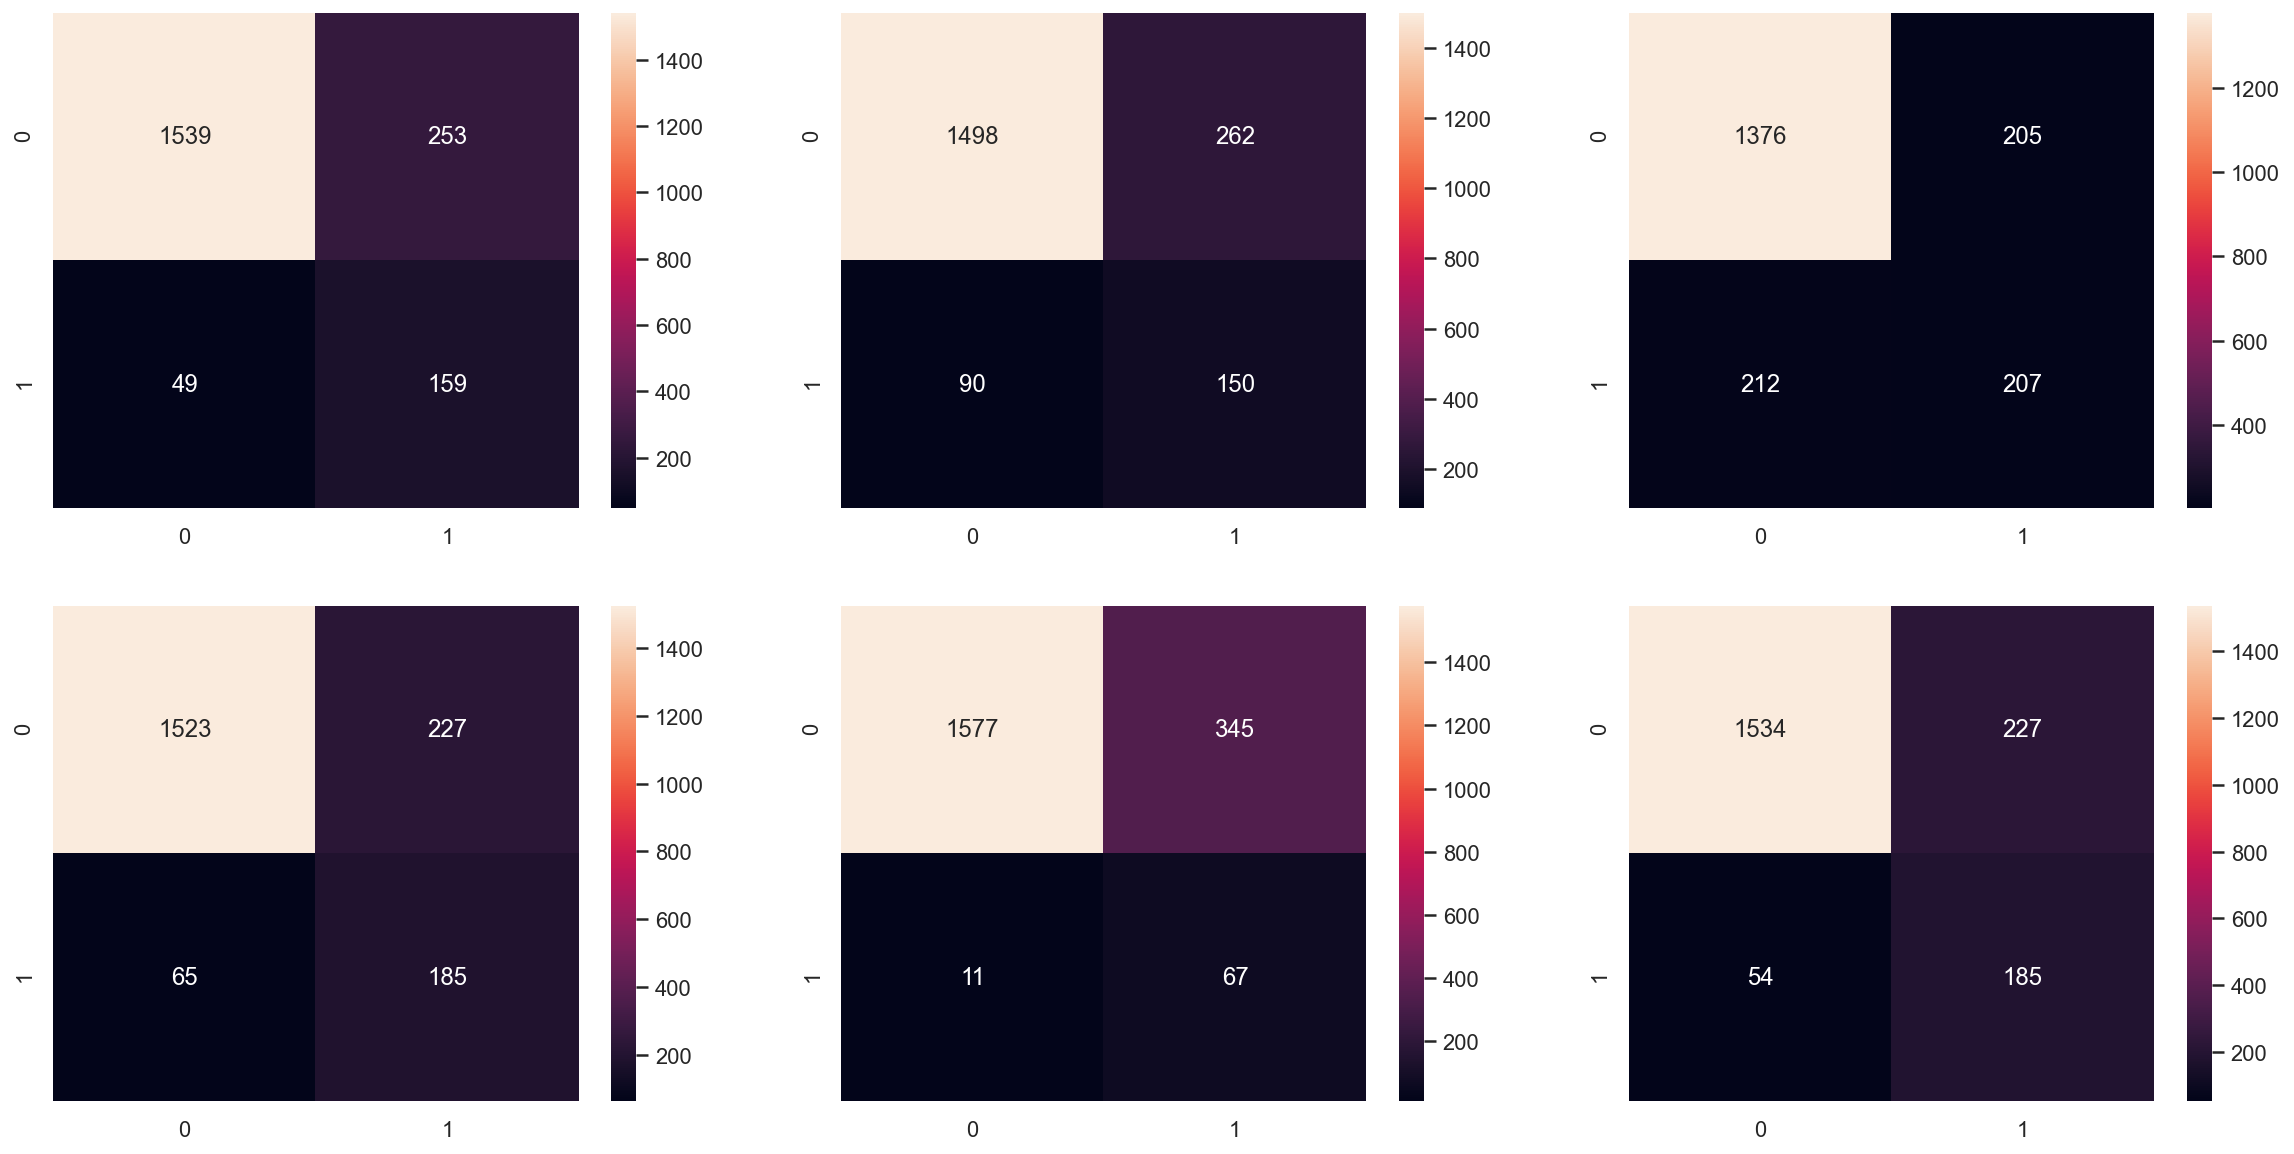

In [33]:
# visual representation of confusion Matrix
sns.set(rc={'figure.figsize':(20,10)})
fig,axs = plt.subplots(2,3)
sns.set_theme(palette="Paired")
sns.heatmap(conf_mat_LR, annot=True, fmt='d',ax=axs[0,0])
sns.heatmap(conf_mat_KNN, annot=True, fmt='d',ax=axs[0,1])
sns.heatmap(conf_mat_CART, annot=True, fmt='d',ax=axs[0,2])
sns.heatmap(conf_mat_RF, annot=True, fmt='d',ax=axs[1,0])
sns.heatmap(conf_mat_SVC, annot=True, fmt='d',ax=axs[1,1])
sns.heatmap(conf_mat_GB, annot=True, fmt='d',ax=axs[1,2])

In [34]:
# evaluation metrics for all models
print("Logistic Regression")
print("F1 Score: {:.4f}".format(f1_score(y_test, y_pred_LR)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_LR)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_LR)))
print("ROC_AUC Score: {:.4f}\n".format(roc_auc_score(y_test, y_pred_LR)))

print("K-NearestNeighbour")
print("F1 Score: {:.4f}".format(f1_score(y_test, y_pred_KNN)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_KNN)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_KNN)))
print("ROC_AUC Score: {:.4f}\n".format(roc_auc_score(y_test, y_pred_KNN)))

print("Decision Tree(CART)")
print("F1 Score: {:.4f}".format(f1_score(y_test, y_pred_CART)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_CART)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_KNN)))
print("ROC_AUC Score: {:.4f}\n".format(roc_auc_score(y_test, y_pred_CART)))

print("Random Forest")
print("F1 Score: {:.4f}".format(f1_score(y_test, y_pred_RF)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_RF)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_RF)))
print("ROC_AUC Score: {:.4f}\n".format(roc_auc_score(y_test, y_pred_RF)))

print("Support Vector Machine(SVC)")
print("F1 Score: {:.4f}".format(f1_score(y_test, y_pred_SVC)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_SVC)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_SVC)))
print("ROC_AUC Score: {:.4f}\n".format(roc_auc_score(y_test, y_pred_SVC)))

print("Gradient Boost")
print("F1 Score: {:.4f}".format(f1_score(y_test, y_pred_GB)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_GB)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_GB)))
print("ROC_AUC Score: {:.4f}\n".format(roc_auc_score(y_test, y_pred_GB)))

Logistic Regression
F1 Score: 0.5129
Precision: 0.7644
Recall: 0.3859
ROC_AUC Score: 0.6775

K-NearestNeighbour
F1 Score: 0.4601
Precision: 0.6250
Recall: 0.3641
ROC_AUC Score: 0.6537

Decision Tree(CART)
F1 Score: 0.4982
Precision: 0.4940
Recall: 0.3641
ROC_AUC Score: 0.6845

Random Forest
F1 Score: 0.5589
Precision: 0.7400
Recall: 0.4490
ROC_AUC Score: 0.7040

Support Vector Machine(SVC)
F1 Score: 0.2735
Precision: 0.8590
Recall: 0.1626
ROC_AUC Score: 0.5778

Gradient Boost
F1 Score: 0.5684
Precision: 0.7741
Recall: 0.4490
ROC_AUC Score: 0.7075



# 4- Model Tuning

We will be using randomizedSerachCV for finding the best hyperparameters for our model.
  ###        Model   --------------------            Hyperparameter
1. logistic regression : NA
2. K-Nearest neighbor : n_neighbors ,leaf_size, p
3. Decision Tree : max_depth, min_samples_leaf
4. Support Vector Machine(SVC) : C
5. Random Forest : n_estimators, max_depth, max_features, min_samples_split, min_samples_leaf
6. Gradient Boosting :min_samples_split, min_samples_leaf, max_depth, learning_rate, n_estimators, max_features

In [35]:
#checking for default parameters
model_GB.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 123456,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [53]:
#setting up hyperparameters for randomizedSerachCV method

hyper_KNN = {"n_neighbors": list(range(1,30)),
            "leaf_size": list(range(1,50)),
            "p":[1,2]}

hyper_RF = {"n_estimators": [10, 100, 1000, 1200, 1500],
        "max_depth": [5, 10,15,20,25,30,35,40],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6,8,10,12],
        "min_samples_leaf": [1, 2, 4,6,8,10,12]}
                              
hyper_CART = {"max_depth": [2,4,6,8,10,12,14,16],
        "min_samples_split": [2],
        "min_samples_leaf": [1, 2, 4, 6, 8]}
                              
hyper_SVC = {"C" : [10,15,20,25,30,35,40,45,50]}
                              
hyper_GB = {"n_estimators": [10, 100, 1000, 1200,1500],
        "max_depth": [5, 10,15, 20, 25,30,35,40],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6,8,10,12,14],
        "min_samples_leaf": [1, 2, 4,6,8,10,12,14],
        "learning_rate" : [0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18]}                           


In [38]:
#KNN
model_KNN_2 = KNeighborsClassifier()
#CART
model_CART_2 = DecisionTreeClassifier()
#SVC
model_SVC_2 = SVC()
#RF
model_RF_2 = RandomForestClassifier()
#GB
model_GB_2 = GradientBoostingClassifier()


In [39]:
# Setup RandomizedSearchCV for KNN

rs_KNN = RandomizedSearchCV(estimator=model_KNN_2,
                            param_distributions=hyper_KNN, 
                            n_iter=10, # number of models to try
                            cv=10,
                            verbose=2)
    

# Fit the RandomizedSearchCV version of model_KNN_2
rs_KNN.fit(X_train, y_train);

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] p=1, n_neighbors=25, leaf_size=15 ...............................
[CV] ................ p=1, n_neighbors=25, leaf_size=15, total=   0.2s
[CV] p=1, n_neighbors=25, leaf_size=15 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................ p=1, n_neighbors=25, leaf_size=15, total=   0.1s
[CV] p=1, n_neighbors=25, leaf_size=15 ...............................
[CV] ................ p=1, n_neighbors=25, leaf_size=15, total=   0.1s
[CV] p=1, n_neighbors=25, leaf_size=15 ...............................
[CV] ................ p=1, n_neighbors=25, leaf_size=15, total=   0.1s
[CV] p=1, n_neighbors=25, leaf_size=15 ...............................
[CV] ................ p=1, n_neighbors=25, leaf_size=15, total=   0.1s
[CV] p=1, n_neighbors=25, leaf_size=15 ...............................
[CV] ................ p=1, n_neighbors=25, leaf_size=15, total=   0.1s
[CV] p=1, n_neighbors=25, leaf_size=15 ...............................
[CV] ................ p=1, n_neighbors=25, leaf_size=15, total=   0.1s
[CV] p=1, n_neighbors=25, leaf_size=15 ...............................
[CV] ................ p=1, n_neighbors=25, leaf_size=15, total=   0.1s
[CV] p=1, n_neighbors=25, leaf_size=15 ...............................
[CV] .

[CV] .................. p=1, n_neighbors=2, leaf_size=9, total=   0.1s
[CV] p=1, n_neighbors=2, leaf_size=9 .................................
[CV] .................. p=1, n_neighbors=2, leaf_size=9, total=   0.1s
[CV] p=1, n_neighbors=2, leaf_size=9 .................................
[CV] .................. p=1, n_neighbors=2, leaf_size=9, total=   0.1s
[CV] p=1, n_neighbors=2, leaf_size=9 .................................
[CV] .................. p=1, n_neighbors=2, leaf_size=9, total=   0.1s
[CV] p=1, n_neighbors=2, leaf_size=9 .................................
[CV] .................. p=1, n_neighbors=2, leaf_size=9, total=   0.1s
[CV] p=1, n_neighbors=2, leaf_size=9 .................................
[CV] .................. p=1, n_neighbors=2, leaf_size=9, total=   0.1s
[CV] p=1, n_neighbors=2, leaf_size=9 .................................
[CV] .................. p=1, n_neighbors=2, leaf_size=9, total=   0.1s
[CV] p=1, n_neighbors=2, leaf_size=9 .................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   12.3s finished


In [40]:
rs_KNN.best_params_

{'p': 1, 'n_neighbors': 15, 'leaf_size': 20}

In [45]:

# Setup RandomizedSearchCV for CART
rs_CART = RandomizedSearchCV(estimator=model_CART_2,
                            param_distributions=hyper_CART, 
                            n_iter=10, # number of models to try
                            cv=10,
                            verbose=2)

# Fit the RandomizedSearchCV version of model_CART_2
rs_CART.fit(X_train, y_train);

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] min_samples_split=2, min_samples_leaf=6, max_depth=6 ............
[CV]  min_samples_split=2, min_samples_leaf=6, max_depth=6, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=6, max_depth=6 ............
[CV]  min_samples_split=2, min_samples_leaf=6, max_depth=6, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=6, max_depth=6 ............
[CV]  min_samples_split=2, min_samples_leaf=6, max_depth=6, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=6, max_depth=6 ............
[CV]  min_samples_split=2, min_samples_leaf=6, max_depth=6, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=6, max_depth=6 ............
[CV]  min_samples_split=2, min_samples_leaf=6, max_depth=6, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=6, max_depth=6 ............
[CV]  min_samples_split=2, min_samples_leaf=6, max_depth=6, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=6, max_depth=6 .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  min_samples_split=2, min_samples_leaf=6, max_depth=6, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=6, max_depth=6 ............
[CV]  min_samples_split=2, min_samples_leaf=6, max_depth=6, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=6, max_depth=6 ............
[CV]  min_samples_split=2, min_samples_leaf=6, max_depth=6, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=8, max_depth=6 ............
[CV]  min_samples_split=2, min_samples_leaf=8, max_depth=6, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=8, max_depth=6 ............
[CV]  min_samples_split=2, min_samples_leaf=8, max_depth=6, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=8, max_depth=6 ............
[CV]  min_samples_split=2, min_samples_leaf=8, max_depth=6, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=8, max_depth=6 ............
[CV]  min_samples_split=2, min_samples_leaf=8, max_depth=6, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=8, max_depth=

[CV]  min_samples_split=2, min_samples_leaf=6, max_depth=16, total=   0.1s
[CV] min_samples_split=2, min_samples_leaf=6, max_depth=16 ...........
[CV]  min_samples_split=2, min_samples_leaf=6, max_depth=16, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=4, max_depth=6 ............
[CV]  min_samples_split=2, min_samples_leaf=4, max_depth=6, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=4, max_depth=6 ............
[CV]  min_samples_split=2, min_samples_leaf=4, max_depth=6, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=4, max_depth=6 ............
[CV]  min_samples_split=2, min_samples_leaf=4, max_depth=6, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=4, max_depth=6 ............
[CV]  min_samples_split=2, min_samples_leaf=4, max_depth=6, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=4, max_depth=6 ............
[CV]  min_samples_split=2, min_samples_leaf=4, max_depth=6, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=4, max_dept

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.2s finished


In [46]:
rs_CART.best_params_

{'min_samples_split': 2, 'min_samples_leaf': 6, 'max_depth': 6}

In [47]:

# Setup RandomizedSearchCV for SVC
rs_SVC = RandomizedSearchCV(estimator=model_SVC_2,
                            param_distributions=hyper_SVC, 
                            n_iter=10, # number of models to try
                            cv=10,
                            verbose=2)

# Fit the RandomizedSearchCV version of model_SVC_2
rs_SVC.fit(X_train, y_train);

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................................. C=10, total=   1.2s
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] ............................................. C=10, total=   1.3s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   1.2s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   1.4s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   1.3s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   1.2s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   1.1s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   1.1s
[CV] C=10 ............................................................
[CV] .

[CV] ............................................. C=35, total=   1.5s
[CV] C=40 ............................................................
[CV] ............................................. C=40, total=   1.5s
[CV] C=40 ............................................................
[CV] ............................................. C=40, total=   1.5s
[CV] C=40 ............................................................
[CV] ............................................. C=40, total=   1.5s
[CV] C=40 ............................................................
[CV] ............................................. C=40, total=   1.6s
[CV] C=40 ............................................................
[CV] ............................................. C=40, total=   1.6s
[CV] C=40 ............................................................
[CV] ............................................. C=40, total=   1.6s
[CV] C=40 ............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  2.2min finished


In [48]:
rs_SVC.best_params_

{'C': 20}

In [49]:

# Setup RandomizedSearchCV for RF
rs_RF = RandomizedSearchCV(estimator=model_RF_2,
                            param_distributions=hyper_RF, 
                            n_iter=10, # number of models to try
                            cv=10,
                            verbose=2)

# Fit the RandomizedSearchCV version of model_RF_2
rs_RF.fit(X_train, y_train);

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   6.9s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   7.4s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   6.9s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   8.4s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   7.9s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   7.3s
[CV] n_estimators=1000, min_samples_split=6

[CV]  n_estimators=1000, min_samples_split=12, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   6.6s
[CV] n_estimators=1000, min_samples_split=12, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1000, min_samples_split=12, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   6.7s
[CV] n_estimators=1000, min_samples_split=12, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1000, min_samples_split=12, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   6.4s
[CV] n_estimators=1000, min_samples_split=12, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1000, min_samples_split=12, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   6.8s
[CV] n_estimators=1000, min_samples_split=12, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1000, min_samples_split=12, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   6.4s
[CV] n_estimators=1000, min_sample

[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=6, max_features=auto, max_depth=40, total=   0.1s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=6, max_features=auto, max_depth=40 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=6, max_features=auto, max_depth=40, total=   0.1s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=6, max_features=auto, max_depth=40 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=6, max_features=auto, max_depth=40, total=   0.1s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=6, max_features=auto, max_depth=40 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=6, max_features=auto, max_depth=40, total=   0.1s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=6, max_features=auto, max_depth=40 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=6, max_features=auto, max_depth=40, total=   0.1s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=6

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.7min finished


In [50]:
rs_RF.best_params_

{'n_estimators': 1000,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30}

In [61]:
model_RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 12345,
 'verbose': 0,
 'warm_start': False}

In [54]:

# Setup RandomizedSearchCV for GB
rs_GB = RandomizedSearchCV(estimator=model_GB_2,
                            param_distributions=hyper_GB, 
                            n_iter=10, # number of models to try
                            cv=10,
                            verbose=2)

# Fit the RandomizedSearchCV version of model_GB_2
rs_GB.fit(X_train, y_train);

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] n_estimators=1500, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, learning_rate=0.17 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1500, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, learning_rate=0.17, total= 1.6min
[CV] n_estimators=1500, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, learning_rate=0.17 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min remaining:    0.0s


[CV]  n_estimators=1500, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, learning_rate=0.17, total= 1.6min
[CV] n_estimators=1500, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, learning_rate=0.17 
[CV]  n_estimators=1500, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, learning_rate=0.17, total= 1.6min
[CV] n_estimators=1500, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, learning_rate=0.17 
[CV]  n_estimators=1500, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, learning_rate=0.17, total= 1.8min
[CV] n_estimators=1500, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, learning_rate=0.17 
[CV]  n_estimators=1500, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, learning_rate=0.17, total= 1.7min
[CV] n_estimators=1500, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, learning_rate=0.

[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=30, learning_rate=0.18, total=   1.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=30, learning_rate=0.18 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=30, learning_rate=0.18, total=   0.9s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=30, learning_rate=0.18 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=30, learning_rate=0.18, total=   0.9s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=30, learning_rate=0.18 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=30, learning_rate=0.18, total=   0.9s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=30, learning_rate=0.18 
[CV]  n_esti

[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=15, learning_rate=0.11, total= 1.2min
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=15, learning_rate=0.11 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=15, learning_rate=0.11, total= 1.1min
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=15, learning_rate=0.11 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=15, learning_rate=0.11, total= 1.1min
[CV] n_estimators=1500, min_samples_split=12, min_samples_leaf=4, max_features=auto, max_depth=40, learning_rate=0.06 
[CV]  n_estimators=1500, min_samples_split=12, min_samples_leaf=4, max_features=auto, max_depth=40, learning_rate=0.06, total= 2.9min
[CV] n_estimators=1500, min_samples_split=12, min_samples_leaf=4, max_features=auto, max_depth=40, learning_rate

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 72.1min finished


In [57]:
rs_GB.best_params_

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 14,
 'max_features': 'sqrt',
 'max_depth': 15,
 'learning_rate': 0.06}

In [82]:
# {'n_estimators': 100,
#  'min_samples_split': 8,
#  'min_samples_leaf': 6,
#  'max_features': 'sqrt',
#  'max_depth': 10,
#  'learning_rate': 0.08}
model_GB.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 123456,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [58]:

# logistic regression
model_lr = LogisticRegression()
lr = LogisticRegression().fit(X,y)

# K-NN 
model_knn = KNeighborsClassifier()
# K-NN tuning
knn_param = {'p': 1, 'n_neighbors': 15, 'leaf_size': 20}
knn_tuned = KNeighborsClassifier(**knn_param).fit(X,y)

# Decision tree CART
model_cart = DecisionTreeClassifier()
#CART tuning
cart_param = {'min_samples_split': 2, 'min_samples_leaf': 6, 'max_depth': 6}
cart_tuned = DecisionTreeClassifier(**cart_param).fit(X,y)

# support vector machine SVC
model_svc = SVC()
#SVC tuning
svc_param = {'C': 20, 'probability': True}
svc_tuned = SVC(**svc_param).fit(X,y)

# Random Forest
model_rf = RandomForestClassifier()
#RF tuning
rf_param = {'n_estimators': 1000,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30}
rf_tuned = RandomForestClassifier(**rf_param).fit(X,y)

# GBM
model_GBM = GradientBoostingClassifier()
# Model Tuning
gbm_params = {'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 14,
 'max_features': 'sqrt',
 'max_depth': 15,
 'learning_rate': 0.06}
gbm_tuned = GradientBoostingClassifier(**gbm_params).fit(X,y)


In [59]:
models_tuned = [("Logistic Regression", lr),
         ("KNN Tuned",knn_tuned),
          ("CART Tuned",cart_tuned),
          ("SVC Tuned",svc_tuned),
          ("Random Forest Tuned",rf_tuned),
          ("Gradient Boost",gbm_tuned),]

In [60]:
# fitting the model and checking for accuracy.

training_accuracy_tuned = []
test_accuracy_tuned =[]
names = []
for name, model in models_tuned:
    model.fit(X_train, y_train)
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    training_accuracy_tuned.append(accuracy_train)
    test_accuracy_tuned.append(accuracy_test)
    names.append(name)
    print(f"{name}:Tuned Training Accuracy: {round(accuracy_train,4)} and Tuned Test Accuracy: {round(accuracy_test,4)}")
   

Logistic Regression:Tuned Training Accuracy: 0.8404 and Tuned Test Accuracy: 0.849
KNN Tuned:Tuned Training Accuracy: 0.8478 and Tuned Test Accuracy: 0.8285
CART Tuned:Tuned Training Accuracy: 0.8656 and Tuned Test Accuracy: 0.8575
SVC Tuned:Tuned Training Accuracy: 0.8706 and Tuned Test Accuracy: 0.854
Random Forest Tuned:Tuned Training Accuracy: 0.941 and Tuned Test Accuracy: 0.86
Gradient Boost:Tuned Training Accuracy: 0.9874 and Tuned Test Accuracy: 0.861


In [61]:
# evaluate each  tuned models with 10-fold cross validation

results_tuned = []
names = []
for name, model in models_tuned:
    kfold = KFold(n_splits=10, random_state=123456)
    cv_results = cross_val_score(model, X, y, cv=10, scoring="accuracy")
    results_tuned.append(cv_results)
    names.append(name)
    print(f"{name}: {round(cv_results.mean(),4)} ({round((cv_results.std()),4)})")

Logistic Regression: 0.8405 (0.0088)
KNN Tuned: 0.8337 (0.0066)
CART Tuned: 0.8551 (0.0071)
SVC Tuned: 0.853 (0.0102)
Random Forest Tuned: 0.865 (0.0087)
Gradient Boost: 0.8608 (0.0064)


In [62]:
# #Logistic Regression: 0.8405 (0.0088)
# KNN Tuned: 0.8334 (0.0051)
# CART Tuned: 0.8555 (0.0074)
# SVC Tuned: 0.853 (0.0102)
# Random Forest Tuned: 0.8642 (0.0072)
# Gradient Boost: 0.862 (0.0068)
# LR Model prediction 
y_pred_LR_ = lr.predict(X_test)
conf_mat_LR = confusion_matrix(y_pred_LR_,y_test)
print('Logistic Regression :\n',conf_mat_LR)
print("F1 Score: {:.4f}".format(f1_score(y_test, y_pred_LR_)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_LR_)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_LR_)))
print("ROC_AUC Score: {:.4f}\n".format(roc_auc_score(y_test, y_pred_LR_)))

# KNN Model prediction 
y_pred_KNN_Tuned = knn_tuned.predict(X_test)
conf_mat_KNN_Tuned = confusion_matrix(y_pred_KNN_Tuned,y_test)
print('K-Nearest Neighbor Tuned :\n',conf_mat_KNN_Tuned)
print("F1 Score: {:.4f}".format(f1_score(y_test, y_pred_KNN_Tuned)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_KNN_Tuned)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_KNN_Tuned)))
print("ROC_AUC Score: {:.4f}\n".format(roc_auc_score(y_test, y_pred_KNN_Tuned)))

# CART Model prediction 
y_pred_CART_Tuned = cart_tuned.predict(X_test)
conf_mat_CART_Tuned = confusion_matrix(y_pred_CART_Tuned,y_test)
print('Decision Tree (CART) Tuned :\n',conf_mat_CART_Tuned)
print("F1 Score: {:.4f}".format(f1_score(y_test, y_pred_CART_Tuned)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_CART_Tuned)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_CART_Tuned)))
print("ROC_AUC Score: {:.4f}\n".format(roc_auc_score(y_test, y_pred_CART_Tuned)))

# SVC Model prediction 
y_pred_SVC_Tuned = svc_tuned.predict(X_test)
conf_mat_SVC_Tuned = confusion_matrix(y_pred_SVC_Tuned,y_test)
print('Support Vector Machine (SVC) Tuned :\n',conf_mat_SVC_Tuned)
print("F1 Score: {:.4f}".format(f1_score(y_test, y_pred_SVC_Tuned)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_SVC_Tuned)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_SVC_Tuned)))
print("ROC_AUC Score: {:.4f}\n".format(roc_auc_score(y_test, y_pred_SVC_Tuned)))

# RF Model prediction 
y_pred_RF_Tuned = rf_tuned.predict(X_test)
conf_mat_RF_Tuned = confusion_matrix(y_pred_RF_Tuned,y_test)
print('Random Forest Tuned :\n',conf_mat_RF_Tuned)
print("F1 Score: {:.4f}".format(f1_score(y_test, y_pred_RF_Tuned)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_RF_Tuned)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_RF_Tuned)))
print("ROC_AUC Score: {:.4f}\n".format(roc_auc_score(y_test, y_pred_RF_Tuned)))

#GB Model prediction 
y_pred_GB_Tuned = gbm_tuned.predict(X_test)
conf_mat_GB_Tuned = confusion_matrix(y_pred_GB_Tuned,y_test)
print('Gradient Boost Tuned :\n',conf_mat_GB_Tuned)
print("F1 Score: {:.4f}".format(f1_score(y_test, y_pred_GB_Tuned)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_GB_Tuned)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_GB_Tuned)))
print("ROC_AUC Score: {:.4f}\n".format(roc_auc_score(y_test, y_pred_GB_Tuned)))

Logistic Regression :
 [[1539  253]
 [  49  159]]
F1 Score: 0.5129
Precision: 0.7644
Recall: 0.3859
ROC_AUC Score: 0.6775

K-Nearest Neighbor Tuned :
 [[1538  293]
 [  50  119]]
F1 Score: 0.4096
Precision: 0.7041
Recall: 0.2888
ROC_AUC Score: 0.6287

Decision Tree (CART) Tuned :
 [[1538  235]
 [  50  177]]
F1 Score: 0.5540
Precision: 0.7797
Recall: 0.4296
ROC_AUC Score: 0.6991

Support Vector Machine (SVC) Tuned :
 [[1547  251]
 [  41  161]]
F1 Score: 0.5244
Precision: 0.7970
Recall: 0.3908
ROC_AUC Score: 0.6825

Random Forest Tuned :
 [[1536  228]
 [  52  184]]
F1 Score: 0.5679
Precision: 0.7797
Recall: 0.4466
ROC_AUC Score: 0.7069

Gradient Boost Tuned :
 [[1524  214]
 [  64  198]]
F1 Score: 0.5875
Precision: 0.7557
Recall: 0.4806
ROC_AUC Score: 0.7201



## Project summary 

After performing  EDA and model selection and tuning,the result of the experiment shows that gradient boosting algorithem is the best algorithem for employee churn prediction for this banking industry with cross validation acuuracy of 86.08% and 
F1 Score: 0.5875
Precision: 0.7557
Recall: 0.4806
ROC_AUC Score: 0.7201